In [ ]:
# ===============================================================================================================#
# Copyright 2023 Infosys Ltd.                                                                          #
# Use of this source code is governed by Apache License Version 2.0 that can be found in the LICENSE file or at  #
# http://www.apache.org/licenses/                                                                                #
# ===============================================================================================================#

## Change History

### 2024-03-21:
- `tool_01_qna.ipynb`(MODIFIED)   
   Includes interactive Q&A, on native pdf containing image having text within.
<hr>

### 2024-03-21:
- `article_01_segmentation_visualized.ipynb` (ADDED)  
   Demonstrate the segmentation and chunking process.
- `uc_01_image_chunk_creation.ipynb` (REMOVED)
- `uc_02_image_chunk_creation.ipynb` (REMOVED) 
- `tool_01_qna.ipynb`(MODIFIED)   
   Includes interactive Q&A, on native pdf containing table within it.  <hr>

### 2024-03-14:

#### `uc_30.1_image_indexing_vectordb.ipynb`  (REMOVED)

#### Environment varaiable usage in config file (New Feature)
A new feature has been added that allows the use of environment variables in config files. This feature can be used to store confidential values locally, such as keys and server URLs, in environment variables for added security.
- `installation.ipynb`(MODIFIED)
- `tool_01_qna.ipynb` (MODIFIED)
- `uc_30_indexing_vectordb.ipynb` (MODIFIED)
- `uc_31_indexing_graphdb.ipynb` (MODIFIED)
- `uc_40_retrieval_batch.ipynb` (MODIFIED)
- `uc_40.1_retrieval_custom.ipynb`(MODIFIED)
- `uc_41_retrieval_online.ipynb`(MODIFIED)
- `uc_50_inferencing_batch.ipynb`(MODIFIED)
- `uc_51_inferencing_online.ipynb`(MODIFIED)

<hr/>

### 2024-03-07:

#### `Tool 01 - Q&A (Interactive)`  (ADDED)
Demonstrate interactive Q&A.
#### `uc_51_inferencing_online.ipynb`  (ADDED)
Demonstrate the ability to do Q&A without any dependency on request files and data files.
#### `uc_41_retrieval_online.ipynb`  (ADDED)
Demonstrate the ability to retrieve top_k results without any dependency on request files and data files.
#### `uc_30.1_image_indexing_vectordb.ipynb`  (ADDED)
Demonstrate the indexing pipeline on image file and use of infy_ocr_engine_provider technique for image file.
####  `uc_30_indexing_vectordb.ipynb`  (MODIFED)
Demonstrate pdf and image file document indexing into a vector db.
#### Renamed use cases
`uc_50_inferencing.ipynb` -> `uc_50_inferencing_batch.ipynb`

`uc_40_retrieval.ipynb` -> `uc_40_retrieval_batch.ipynb`

<hr/>

### 2024-02-23:

#### `uc_31_indexing_graphdb.ipynb`  (ADDED)
Demonstrate how unstructured data from text or pdf file can be visualized in Neo4j graph db.
After the document indexing to vectordb and extracting attributes from vectordb it uses 
extracted attribute json along with the schema file and create cypher query then this query is executed in Neo4j to show relationship between attributes in graph db.

####  `uc_30_indexing_vectordb.ipynb`  (ADDED)
Demonstrate document indexing into vectordb as embeddings.
This allow to store multiple document into one vectordb if in `dpp_pipeline_index_input_config.json` "db_name": "documents" as well as document wise embedding storage if "db_name": null

#### `uc_40_retrieval.ipynb`  (ADDED)
Demonstrate searching from vectordb, if the query is provided in config it will return the best possible matching chunks in which answer is expected based on similarity search.

#### `uc_50_inferencing.ipynb`  (ADDED)
Demonstrate Q&A feature, for the provided query LLM gives answer from the provided chunks to it.

#### `installation.ipynb`  (ADDED)
Run to install packages and copy program files before running use cases.

#### Renamed use cases
`uc_30_indexing.ipynb` ->  `uc_30_indexing_vectordb.ipynb`

`uc_32_retrieval.ipynb` ->  `uc_40_retrieval.ipynb`

`uc_32.1_retrieval.ipynb` -> ` uc_40.1_retrieval_custom.ipynb`

`uc_31_inferencing.ipynb` -> `uc_50_inferencing.ipynb`

# 1. About Libraries

 - ##### `infy_dpp_core` consists of RequestCreator, metadata_extractor, document_data_saver, request_closer , document_data_updater
- ##### `infy_dpp_segmentation` consists of segment_generator, segment_parser, chunk_generator, chunk_saver
- ##### `infy_dpp_sdk` library is used as a dpp framework to create uniform input/output structure

If you want to install all dependancies of segmentation, please install as followed.

   > `pip install ./lib/infy_dpp_segmentation-0.0.1-py3-none-any.whl['all']`

If you want to install for any specific library like segment-generator and segment-parser please follow below respectively
   > `pip install ./lib/infy_dpp_segmentation-0.0.1-py3-none-any.whl['segment-generator']`
   
   > Download and install `pip install ./lib/detectron2-0.5+cpu-cp38-cp38-linux_x86_64.whl` from https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch1.9/index.html (It's supported only in linux environment.)
   
   > `pip install ./lib/infy_dpp_segmentation-0.0.1-py3-none-any.whl['segment-parser']`

# 2. Processor Configurations

##### Please make sure to configure the `pipeline_input_config.json`.
> 1.`RequestCreator` - `read_path` is the relative path from where processor fetches the input docs.

> 2.`RequestCloser` - `output_root_path` is the relative path where processor generates the output.

> 3.`SegmentGenerator` - 

   > `a.` Make sure textproviders properties are configured properly. Its used for extracting text from input documents.
   
   > `b.` To detect the segment using detectron download the model from - configure model path and config file path accordingly. (This works only in linux env)
   
   > github-link - https://github.com/ibm-aur-nlp/PubLayNet/tree/master/pre-trained-models
   
   > model-path - https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/pre-trained-models/Mask-RCNN/model_final.pkl
   
   > config-path - https://github.com/ibm-aur-nlp/PubLayNet/blob/master/pre-trained-models/Mask-RCNN/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml
   
   > `c.` Activate the techniques based on the file type, text providers and model providers 
   
> `4.Segment Parser` - Provide layout and enable the pattern.

> `5.ChunkDataParser` - Provide type of chunk like `page`, `paragraph`. Also you can limit pages using `page_num` property.

> `6.SaveChunkDataParser` - provide the root path to save the chunks and its meta data in text file format.

## 2a. RequestCreator

```json
{
    "read_path": "/input/",
    "batch_size": 20,
    "filter": {
        "include": [
            "jpg",
            "json"
        ],
        "exclude": [
            "_"
        ]
    },
    "work_root_path": "/work/",
    "queue": {
        "enabled": true,
        "queue_root_path": "/work/queue/"
    }
}
```

##### `read_path`: its the relative path from where processor fetches documents
##### `batch_size`: Here we can define how many files can be taken at a time for processing
##### `filter`: we can mention which documents need to include and exclude.
##### `work_root_path`: where all the internal files will be there

## 2b. RequestCloser

```json
{
    "queue": {
        "enabled": true,
        "queue_root_path": "/work/queue/"
    },
    "work_root_path": "/work/",
    "output_root_path": "/output/"
}
```

##### `work_root_path`: This path should be same as `ReuestCreator`
##### `output_root_path`: Output root path should be defined

## 2c. SegmentGenerator

```json
{
    "textProviders": [
        {
            "provider_name": "tesseract_ocr_provider",
            "properties": {
                "tesseract_path": ""
            }
        },
        {
            "provider_name": "azure_read_ocr_provider",
            "properties": {
                "subscription_key": "",
                "url": ""
            }
        },
        {
            "provider_name": "pdf_box_text_provider",
            "properties": {}
        },
        {
            "provider_name": "json_provider",
            "properties": {
                "template1_file_path": "/data/config/templates/email_template.txt"
            }
        }
    ],
    "modelProviders": [
        {
            "provider_name": "detectron",
            "properties": {
                "model_path": "",
                "config_file_path": "",
                "model_threshold": 0.8
            }
        }
    ],
    "techniques": [
        {
            "enabled": false,
            "name": "technique1",
            "input_file_type": "image",
            "text_provider_name": "tesseract_ocr_provider",
            "model_provider_name": "detectron"
        },
        {
            "enabled": false,
            "name": "technique2",
            "input_file_type": "image",
            "text_provider_name": "azure_read_ocr_provider",
            "model_provider_name": "detectron"
        },
        {
            "enabled": false,
            "name": "technique3",
            "input_file_type": "pdf",
            "text_provider_name": "pdf_box_text_provider",
            "model_provider_name": null
        },
        {
            "enabled": false,
            "name": "technique4",
            "input_file_type": "pdf",
            "text_provider_name": "pdf_box_text_provider",
            "model_provider_name": "detectron"
        },
        {
            "enabled": false,
            "name": "technique5",
            "input_file_type": "json",
            "text_provider_name": "json_provider",
            "model_provider_name": null
        },
        {
            "enabled": true,
            "name": "technique6",
            "input_file_type": "image",
            "text_provider_name": "azure_read_ocr_provider",
            "model_provider_name": null
        }
    ]
}
```

##### `textProviders`: Here provide the supported text providers and their properties
##### `modelProviders`: Need to provide model details in list if used
##### `techniques`: Need to enable which combination of text providers and model providers to used.

## 2d. SegmentDataParser

```json
{
    "layout": {
        "single-column": {
            "enabled": true
        },
        "multi-column": {
            "enabled": false
        }
    },
    "pattern": {
        "sequence-order": {
            "enabled": true
        },
        "left-right": {
            "enabled": false
        },
        "zig-zag": {
            "enabled": false
        }
    }
}
```

##### `layout`: Here need to mention document column type
##### `pattern`: Its the reading techniue from documents like top to bottom, left to right or zig zag.

## 2e. ChunkDataParser

In [ ]:
{
    "chunking_method": "page",
    "merge_title_paragraph": false,
    "page_num": [
        "1:10"
    ],
    "exclude": [
        "table",
        "figure"
    ]
}

##### `chunking_method`: Chunk will be paragraph or page level
##### `page_num`: Mention the to be extracted Page number
##### `exclude`: Need to mention which type of content type you need to exclude. Note: it works only with `detectron` model provider as of now. 

## 2f. SaveChunkDataParser

```json
{
    "chunked_files_root_path": "/chunked"
}
```

##### `chunked_files_root_path`: Mention where you want to save chunked data and its repective metadata

## 3. File System

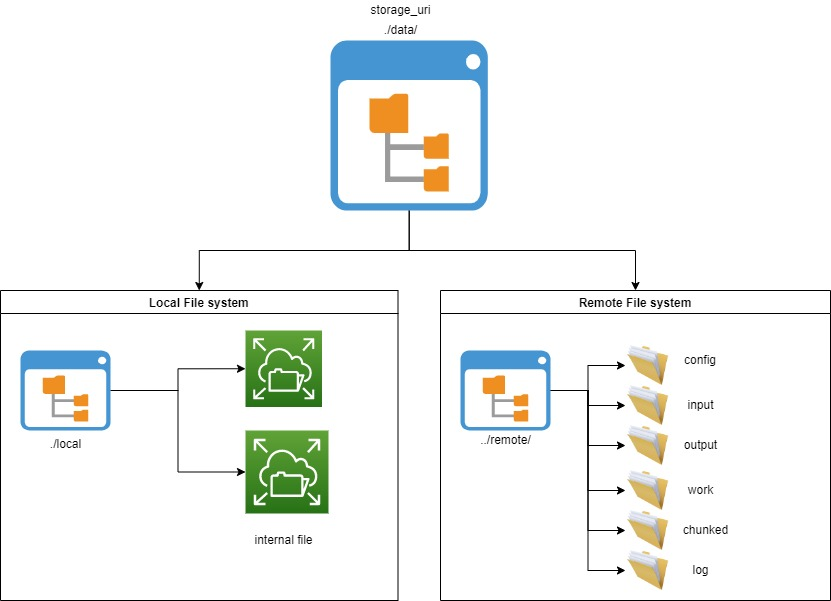